In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KernelDensity
import pickle
import random

In [44]:
# import scores for using 1000datapoints (all five lick intervals for classification)

with open(~'/BayesScores_TempDat_temps_alphapoint875.pkl', 'rb') as f:
    all5li = pickle.load(f)
all5li = all5li[0:433]

In [45]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_TempDat_temps_alphapoint875_li0.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li1.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li2.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li3.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li4.pkl']
file_path = '' #fill in appropriately 
nVSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    nVSscores = np.concatenate((nVSscores, current_file[:, 1].reshape(-1, 1)), axis=1)

print(nVSscores)

[[0.00000000e+00 5.48148148e-01 5.88888889e-01 4.81481481e-01
  3.81481481e-01 2.81481481e-01]
 [1.00000000e+00 4.88888889e-01 4.14814815e-01 3.11111111e-01
  2.74074074e-01 3.81481481e-01]
 [2.00000000e+00 3.18518519e-01 2.88888889e-01 3.33333333e-01
  2.96296296e-01 3.14814815e-01]
 ...
 [4.30000000e+02 2.48148148e-01 3.29629630e-01 2.33333333e-01
  2.66666667e-01 3.85185185e-01]
 [4.31000000e+02 3.66666667e-01 3.22222222e-01 3.51851852e-01
  2.88888889e-01 3.77777778e-01]
 [4.32000000e+02 3.00000000e-01 3.51851852e-01 3.77777778e-01
  3.33333333e-01 2.92592593e-01]]


In [46]:
scores_columns = nVSscores[:,1:]
scores_columns.shape

(433, 5)

In [47]:
# Extracting the second column
second_column = all5li[:, 1]
# Calculating the mean of the top 20% of values
top_mean = np.mean(np.sort(second_column)[::-1][:int(0.2*len(second_column))])
print(f"Mean of the top 20% of all 5 LI: {top_mean}")

Mean of the top 20% of all 5 LI: 0.5575340947622069


In [48]:
top_20_means = [(i+1,np.mean(np.sort(scores_columns[:,i])[::-1][:int(0.2*len(scores_columns[:,i]))])) for i in range(5)]

print(top_20_means)

[(1, 0.4481677582942973), (2, 0.48897645433555154), (3, 0.4921799882743795), (4, 0.48302610420941455), (5, 0.48639538439470054)]


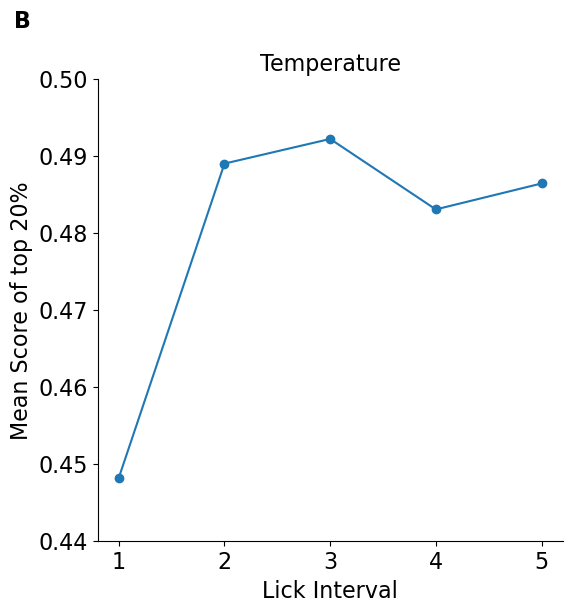

In [49]:
x_values, y_values = zip(*top_20_means)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x_values, y_values, marker='o', label='mean of the top 20% for each lick interval')
#ax.plot(range(1, 6), random_samples_means, marker='o')
#ax.axhline(y=top_mean, color='r', linestyle='--', label='mean of top 20% over all 5 lick intervals')
#ax.axhline(y=0.33, color='black', linestyle='--', label='random guessing')
ax.set_xticks(range(1,6))
ax.tick_params(axis='both', which='major', labelsize=16)
tick_labels = [0.000,None,0.250,None,0.500,None,0.750,None,1.000]
ax.set_ylim(0.44, 0.5)
ax.text(-0.18, 1.15, 'B', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
# Adding labels and title
ax.set_xlabel('Lick Interval',fontsize=16)
ax.set_ylabel('Mean Score of top 20%',fontsize=16)
ax.set_title('Temperature', fontsize=16)
#ax.legend(loc='upper right', bbox_to_anchor=(1.75, 1.0))
# Display the plot
#plt.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("temp_accross_LI.svg")
plt.show()

# Taste: all four tastes 

In [31]:
# import scores for using 1000datapoints (all five lick intervals for classification)
all5lis = []
with open(~'/BayesScores_taste_012_alphapoint875.pkl', 'rb') as f:
    all5lis.append(pickle.load(f))
with open(~'/BayesScores_taste_013_alphapoint875.pkl', 'rb') as f:
    all5lis.append(pickle.load(f))
with open(~'/BayesScores_taste_023_alphapoint875.pkl', 'rb') as f:
    all5lis.append(pickle.load(f))
with open(~'/BayesScores_taste_123_alphapoint875.pkl', 'rb') as f:
    all5lis.append(pickle.load(f))

In [32]:
all5li = (all5lis[0] + all5lis[1] + all5lis[2] + all5lis[3])/4
all5li

array([[0.00000000e+00, 7.07142857e-01],
       [1.00000000e+00, 4.44047619e-01],
       [2.00000000e+00, 3.98809524e-01],
       ...,
       [5.26000000e+02, 4.50732601e-01],
       [5.27000000e+02, 3.89743590e-01],
       [5.28000000e+02, 2.53571429e-01]])

In [33]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_TasteDat_taste_012_allLI_allAlpha.pkl',
             'BayesScores_TasteDat_taste_013_allLI_allAlpha.pkl',
             'BayesScores_TasteDat_taste_032_allLI_allAlpha.pkl',
              'BayesScores_TasteDat_taste_312_allLI_allAlpha.pkl',]
file_path = '' #fill in appropriately 
nVSscores = []

for file_name in file_names:
    current_file = pd.read_pickle(file_path + file_name)
    nVSscores.append(current_file)

print(len(nVSscores))

4


In [34]:
#reshape the last three files to be all one file the same size as the other taste combinations
average_array = (nVSscores[0] + nVSscores[1] + nVSscores[2] + nVSscores[3]) / 4
average_array.shape

(5, 529, 9)

In [35]:
all5li

array([[0.00000000e+00, 7.07142857e-01],
       [1.00000000e+00, 4.44047619e-01],
       [2.00000000e+00, 3.98809524e-01],
       ...,
       [5.26000000e+02, 4.50732601e-01],
       [5.27000000e+02, 3.89743590e-01],
       [5.28000000e+02, 2.53571429e-01]])

In [36]:
scores_columns = average_array[:,:,-2] 
scores_columns.T.shape

(529, 5)

In [37]:
scores_columns = scores_columns.T
scores_columns.shape

(529, 5)

In [38]:
scores_columns


array([[0.52857143, 0.55714286, 0.60595238, 0.43928571, 0.40952381],
       [0.31071429, 0.41309524, 0.40952381, 0.41190476, 0.32142857],
       [0.32142857, 0.37857143, 0.37857143, 0.40357143, 0.35952381],
       ...,
       [0.30741758, 0.36300366, 0.33608059, 0.37921245, 0.41391941],
       [0.37307692, 0.40641026, 0.38333333, 0.39615385, 0.37820513],
       [0.30119048, 0.33928571, 0.32142857, 0.32142857, 0.34880952]])

In [39]:
# Extracting the second column
second_column = all5li[:, 1]
# Calculating the mean of the top 20% of values
top_mean = np.mean(np.sort(second_column)[::-1][:int(0.2*len(second_column))])
print(f"Mean of the top 20% of all 5 LI: {top_mean}")

Mean of the top 20% of all 5 LI: 0.4844978335156907


In [40]:
top_20_means = [(i+1,np.mean(np.sort(scores_columns[:,i])[::-1][:int(0.2*len(second_column))])) for i in range(5)]

print(top_20_means)

[(1, 0.41109917595631884), (2, 0.4347037001798907), (3, 0.44327245373673946), (4, 0.4356573624787911), (5, 0.434550197818055)]


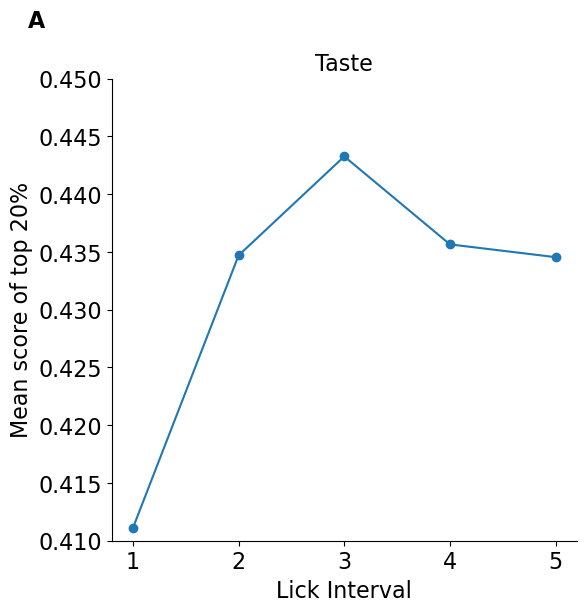

In [42]:
x_values, y_values = zip(*top_20_means)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x_values, y_values, marker='o', label='mean of the top 20% for each lick interval')
ax.set_xticks(range(1,6))
ax.set_ylim(0.41, 0.45)
ax.text(-0.18, 1.15, 'A', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax.tick_params(axis='both', which='major', labelsize=16)

# Adding labels and title
ax.set_xlabel('Lick Interval', fontsize=16)
ax.set_ylabel('Mean score of top 20%',fontsize=16)
ax.set_title('Taste', fontsize=16)
#ax.legend(loc='upper right', bbox_to_anchor=(1.75, 1.0))
# Display the plot
#plt.axis('off')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("taste_accross_LI.svg")
plt.show()